## Observations and Insights 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata_path_df = pd.DataFrame(mouse_metadata)
study_results_path_df = pd.DataFrame(study_results)

combined_df = pd.merge(mouse_metadata_path_df, study_results_path_df, on = "Mouse ID",)


combined_df

# Combine the data into a single dataset

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
# Checking the number of mice.

mouse_count = len(combined_df["Mouse ID"].unique())
mouse_count_total = pd.DataFrame({"Mouse Count": [mouse_count]})
mouse_count_total

,Mouse Count
0,249


In [17]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# combined_df_dups = combined_df.duplicated()
# combined_dups = np.where(combined_df_dups == True)
# combined_dups.groupby["Mouse ID"]
clean_df = combined_df.drop_duplicates()
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [18]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_df_dups = combined_df.duplicated()
combined_df_id = np.where(combined_df_dups == True)
dup_mouse = combined_df.iloc[combined_df_id]
dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates()
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(combined_df["Mouse ID"].unique())
mouse_count

249

## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

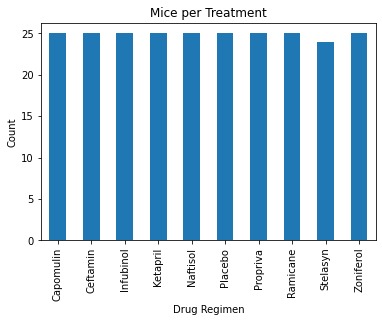

In [23]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
clean_df.groupby("Drug Regimen")["Mouse ID"].nunique().plot(kind="bar", title = "Mice per Treatment")
plt.ylabel("Count")
plt.show()


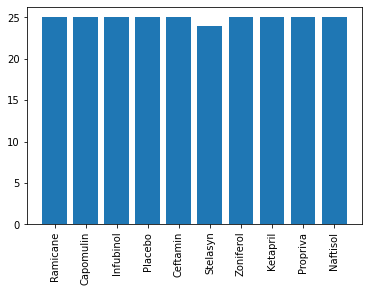

In [24]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
treatment_name = (clean_df["Drug Regimen"].unique())

clean_df.groupby("Drug Regimen")["Mouse ID"].nunique()
mouse_per_treatment=[]
for treatment in treatment_name:
    temp=clean_df.loc[clean_df["Drug Regimen"]==treatment]
    mouse_per_treatment.append(len(np.unique(temp["Mouse ID"])))
mouse_per_treatment
x= treatment_name
height = mouse_per_treatment
plt.bar(x, height)
plt.xticks(rotation = "vertical")
plt.show()

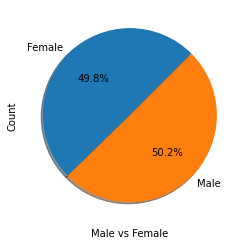

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_df.groupby("Sex")["Mouse ID"].nunique().plot(kind="pie", autopct='%1.1f%%', shadow=True, startangle=45)
plt.xlabel("Male vs Female")
plt.ylabel("Count")

plt.show()



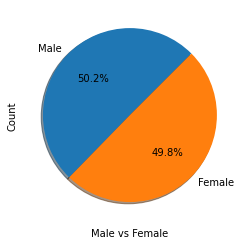

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
treatment_name = (clean_df["Sex"].unique())


mouse_per_treatment=[]
for treatment in treatment_name:
    temp=clean_df.loc[clean_df["Sex"]==treatment]
    mouse_per_treatment.append(len(np.unique(temp["Mouse ID"])))
    
fig = plt.figure()
plt.pie(mouse_per_treatment, labels = treatment_name, autopct='%1.1f%%', shadow=True, startangle=45)
plt.xlabel("Male vs Female")
plt.ylabel("Count")
plt.show()






## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
random_mouse = combined_df[(combined_df ==  "j913").any(1)]
x = random_mouse["Timepoint"]
y = random_mouse["Tumor Volume (mm3)"]

# combined_df.plot(kind = "scatter", x = random_mouse["Timepoint"], y = random_mouse["Tumor Volume (mm3)"])
plt.plot(x,y,"r.")
plt.xlabel("Timepoint")
plt.show()

In [ ]:
timepoint = combined_df.groupby(combined_df["Timepoint"])
tumor_volume = combined_df.groupby(combined_df["Tumor Volume (mm3)"])
# plt.scatter(timepoint, tumor_volume)
tumor_volume.head()

# plt.scatter(mouse_metadata_path_df[Timepoint], study_results_path_df["Tumor Volume (mm3)"])
# combined_df.plot(kind = "scatter", x = mouse_metadata_path_df["Timepoint"], y = study_results_path_df["Tumor Volume (mm3)"])

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
